# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import json
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [4]:
#pprint list of cities 
pprint(cities)

['chagda',
 'mahebourg',
 'rikitea',
 'caluquembe',
 'salalah',
 'jaumave',
 'vegreville',
 'nome',
 'barrow',
 'lulea',
 'jamestown',
 'hithadhoo',
 'linguere',
 'port elizabeth',
 'mar del plata',
 'severo-kurilsk',
 'aswan',
 'iracoubo',
 'tupik',
 'illoqqortoormiut',
 'ahipara',
 'atuona',
 'cape town',
 'kungurtug',
 'bengkulu',
 'nikolskoye',
 'paamiut',
 'bilibino',
 'avarua',
 'taolanaro',
 'havelock',
 'beloha',
 'bethel',
 'port-gentil',
 'vaini',
 'lamar',
 'qaanaaq',
 'asau',
 'punta arenas',
 'chuy',
 'cabo san lucas',
 'mataura',
 'tanete',
 'georgetown',
 'ushuaia',
 'tuktoyaktuk',
 'busselton',
 'baker city',
 'esperance',
 'sao joao da barra',
 'airai',
 'araouane',
 'cockburn town',
 'siguiri',
 'namibe',
 'baymak',
 'geraldton',
 'hilo',
 'stryy',
 'kibakwe',
 'hermanus',
 'puerto ayora',
 'petropavlovsk-kamchatskiy',
 'albany',
 'biltine',
 'kapaa',
 'yellowknife',
 'butaritari',
 'emerald',
 'mazatlan',
 'bageshwar',
 'amahai',
 'benjamin aceval',
 'mlonggo',
 'okh

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [30]:
# inital print statements for data retrieval process
print("Beginning Data Retrieval ")
print("-----------------------------")

# set up list to hold reponse info
cityname = []
cloud = []
country = []
date = []
humidity = []
lat = []
long = []
tempmax = []
wind = []
index_counter = 0
set_counter = 1
# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        tempmax.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
 


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : andra
Processing Record 2 of Set 1 : leningradskiy
Processing Record 3 of Set 1 : leh
Processing Record 4 of Set 1 : santa lucia
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : dikson
Processing Record 8 of Set 1 : ladispoli
Processing Record 9 of Set 1 : derzhavinsk
Processing Record 10 of Set 1 : kapaa
Processing Record 11 of Set 1 : lima
Processing Record 12 of Set 1 : bengkulu
Processing Record 13 of Set 1 : kiruna
Processing Record 14 of Set 1 : jamestown
Processing Record 15 of Set 1 : acarau
Processing Record 16 of Set 1 : bentiu
Processing Record 17 of Set 1 : maldonado
Processing Record 18 of Set 1 : tigil
Processing Record 19 of Set 1 : pangnirtung
Processing Record 20 of Set 1 : arman
Processing Record 21 of Set 1 : qaanaaq
Processing Record 22 of Set 1 : bredasdorp
Processing Record 23 of Set 1 : tilichiki
Processing Record 24

Processing Record 32 of Set 4 : parana
Processing Record 33 of Set 4 : nortelandia
Processing Record 34 of Set 4 : isangel
Processing Record 35 of Set 4 : gore
Processing Record 36 of Set 4 : penarroya-pueblonuevo
Processing Record 37 of Set 4 : longyearbyen
City not found. Skipping...
Processing Record 38 of Set 4 : ribeira brava
City not found. Skipping...
Processing Record 39 of Set 4 : juneau
Processing Record 40 of Set 4 : bontang
Processing Record 41 of Set 4 : iqaluit
Processing Record 42 of Set 4 : uglegorsk
Processing Record 43 of Set 4 : oistins
Processing Record 44 of Set 4 : touros
Processing Record 45 of Set 4 : tiarei
Processing Record 46 of Set 4 : dayong
Processing Record 47 of Set 4 : san carlos de bariloche
Processing Record 48 of Set 4 : surt
Processing Record 49 of Set 4 : sitka
Processing Record 50 of Set 4 : margate
Processing Record 0 of Set 5 : vaitape
Processing Record 1 of Set 5 : dinghai
Processing Record 2 of Set 5 : benguela
Processing Record 3 of Set 5 : m

City not found. Skipping...
Processing Record 15 of Set 8 : senno
Processing Record 16 of Set 8 : te anau
Processing Record 17 of Set 8 : onverwacht
Processing Record 18 of Set 8 : tiznit
Processing Record 19 of Set 8 : tiksi
Processing Record 20 of Set 8 : klaksvik
Processing Record 21 of Set 8 : najran
Processing Record 22 of Set 8 : jackson
Processing Record 23 of Set 8 : bethel
Processing Record 24 of Set 8 : nakapiripirit
Processing Record 25 of Set 8 : osoyoos
Processing Record 26 of Set 8 : petrolia
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 8 : lumberton
Processing Record 28 of Set 8 : kurilsk
Processing Record 29 of Set 8 : okhotsk
Processing Record 30 of Set 8 : hobyo
Processing Record 31 of Set 8 : chachapoyas
Processing Record 32 of Set 8 : jaguarao
Processing Record 33 of Set 8 : nara
Processing Record 34 of Set 8 : mudhol
Processing Record 35 of Set 8 : biskupiec
Processing Record 36 of Set 8 : linhares
Processing Record 37 of Set 

Processing Record 1 of Set 12 : nizwa
Processing Record 2 of Set 12 : miri
Processing Record 3 of Set 12 : cabra
Processing Record 4 of Set 12 : guadalupe y calvo
Processing Record 5 of Set 12 : acapulco
Processing Record 6 of Set 12 : rodrigues alves
Processing Record 7 of Set 12 : dunedin
Processing Record 8 of Set 12 : qiongshan
Processing Record 9 of Set 12 : nipawin
City not found. Skipping...
Processing Record 10 of Set 12 : jega
Processing Record 11 of Set 12 : romitan
Processing Record 12 of Set 12 : ahuimanu
Processing Record 13 of Set 12 : gagarin
Processing Record 14 of Set 12 : corrales
Processing Record 15 of Set 12 : hanchuan
-----------------------------
Data Retrieval Complete
-----------------------------


In [12]:
# inital print statements for data retrieval process
print("Beginning Data Retrieval ")
print("-----------------------------")

# set up list to hold reponse info
city_data = []

# Create counters
record_counter = 1
set_counter = 1

# Loop through all cities in city list
for i, city in enumerate(cities):
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(query_url + city).json()
        # Parse out the info needed such as max temp, humidity, cloudiness, etc
        cityname = response["name"]
        cloud = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        tempmax = response['main']['temp_max']
        wind = response["wind"]["speed"]
        
        # Append info to city_data list
        city_data.append({"City" : cityname,
                          "Cloudiness(%)" : cloud,
                          "Country" : country,
                          "Date" : date,
                          "Humidity(%)" : humidity,
                          "Latitude" : lat,
                          "Longitude" : long,
                          "Max Temperature(F)" : tempmax,
                          "Wind Speed(mph)" : wind})
            
        # Group cities in sets of 50 for logging purposes
        if record_counter > 49:
            record_counter = 1
            set_counter = set_counter + 1
    
        else:
            record_counter = record_counter + 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}") 
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
 


Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1 : mahebourg
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : caluquembe
Processing Record 5 of Set 1 : salalah
Processing Record 6 of Set 1 : jaumave
Processing Record 7 of Set 1 : vegreville
Processing Record 8 of Set 1 : nome
Processing Record 9 of Set 1 : barrow
Processing Record 10 of Set 1 : lulea
Processing Record 11 of Set 1 : jamestown
Processing Record 12 of Set 1 : hithadhoo
Processing Record 13 of Set 1 : linguere
Processing Record 14 of Set 1 : port elizabeth
Processing Record 15 of Set 1 : mar del plata
Processing Record 16 of Set 1 : severo-kurilsk
Processing Record 17 of Set 1 : aswan
Processing Record 18 of Set 1 : iracoubo
Processing Record 19 of Set 1 : tupik
City not found. Skipping...
Processing Record 20 of Set 1 : ahipara
Processing Record 21 of Set 1 : atuona
Processing Record 22 of Set 1 : cape town
Processing Record 23 of Set 1 :

Processing Record 40 of Set 4 : sanchez
Processing Record 41 of Set 4 : solnechnyy
Processing Record 42 of Set 4 : agirish
Processing Record 43 of Set 4 : lavrentiya
Processing Record 44 of Set 4 : vila do maio
Processing Record 45 of Set 4 : kaiyuan
Processing Record 46 of Set 4 : barra do corda
Processing Record 47 of Set 4 : bathsheba
Processing Record 48 of Set 4 : san patricio
City not found. Skipping...
Processing Record 49 of Set 4 : bambous virieux
Processing Record 50 of Set 4 : apatou
Processing Record 1 of Set 5 : nanortalik
Processing Record 2 of Set 5 : victoria
Processing Record 3 of Set 5 : maldonado
Processing Record 4 of Set 5 : quesnel
Processing Record 5 of Set 5 : itacarambi
Processing Record 6 of Set 5 : dingle
Processing Record 7 of Set 5 : gorele
Processing Record 8 of Set 5 : port alfred
Processing Record 9 of Set 5 : totma
Processing Record 10 of Set 5 : portland
Processing Record 11 of Set 5 : cerritos
Processing Record 12 of Set 5 : hailey
Processing Record 1

Processing Record 28 of Set 8 : kiboga
Processing Record 29 of Set 8 : peleduy
Processing Record 30 of Set 8 : kara-tyube
City not found. Skipping...
Processing Record 31 of Set 8 : flin flon
Processing Record 32 of Set 8 : crisan
Processing Record 33 of Set 8 : manokwari
City not found. Skipping...
Processing Record 34 of Set 8 : aksarka
Processing Record 35 of Set 8 : veselynove
Processing Record 36 of Set 8 : imbituba
Processing Record 37 of Set 8 : inhambane
Processing Record 38 of Set 8 : lalibela
Processing Record 39 of Set 8 : limbang
Processing Record 40 of Set 8 : katsuura
Processing Record 41 of Set 8 : gasa
Processing Record 42 of Set 8 : peterhead
Processing Record 43 of Set 8 : bolshaya sosnova
Processing Record 44 of Set 8 : sergeyevka
Processing Record 45 of Set 8 : rorvik
Processing Record 46 of Set 8 : seoul
Processing Record 47 of Set 8 : kununurra
Processing Record 48 of Set 8 : suamico
Processing Record 49 of Set 8 : catazaja
City not found. Skipping...
Processing R

Processing Record 17 of Set 12 : el sauzal
Processing Record 18 of Set 12 : kandava
Processing Record 19 of Set 12 : zeya
Processing Record 20 of Set 12 : kantilo
City not found. Skipping...
Processing Record 21 of Set 12 : jalu
Processing Record 22 of Set 12 : maridi
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a panda data frame using data retrieved
citydata_df = pd.DataFrame(city_data)

citydata_df.count()

City                  571
Cloudiness(%)         571
Country               571
Date                  571
Humidity(%)           571
Latitude              571
Longitude             571
Max Temperature(F)    571
Wind Speed(mph)       571
dtype: int64

In [14]:
# display new data frame
citydata_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Latitude,Longitude,Max Temperature(F),Wind Speed(mph)
0,Mahébourg,75,MU,1623884028,78,-20.4081,57.7000,73.69,13.80
1,Rikitea,98,PF,1623884028,80,-23.1203,-134.9692,74.08,23.51
2,Caluquembe,15,AO,1623884028,52,-13.7833,14.6833,53.96,3.94
3,Salalah,81,OM,1623884029,86,17.0151,54.0924,81.88,4.63
4,Jaumave,12,MX,1623884029,50,23.4167,-99.3833,81.95,6.04


In [15]:
citydata_df.to_csv("output_data/all_city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indexes of cities that have humidity over 100%.
humid_100 = citydata_df[(citydata_df["Humidity(%)"] > 100)].index
humid_100

Int64Index([], dtype='int64')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleancity_data = citydata_df.drop(humid_100, inplace=False)
cleancity_data.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Latitude,Longitude,Max Temperature(F),Wind Speed(mph)
0,Mahébourg,75,MU,1623884028,78,-20.4081,57.7000,73.69,13.80
1,Rikitea,98,PF,1623884028,80,-23.1203,-134.9692,74.08,23.51
2,Caluquembe,15,AO,1623884028,52,-13.7833,14.6833,53.96,3.94
3,Salalah,81,OM,1623884029,86,17.0151,54.0924,81.88,4.63
4,Jaumave,12,MX,1623884029,50,23.4167,-99.3833,81.95,6.04


In [30]:
# Export the cleaned city data into a csv
cleancity_data.to_csv("output_data/clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [51]:
# Extract relevant fields from the data frame to use in plots below
lat = cleancity_data["Latitude"]
tempmax = cleancity_data["Max Temperature(F)"]
humidity = cleancity_data["Humidity(%)"]
cloud = cleancity_data["Cloudiness(%)"]
wind = cleancity_data["Wind Speed(mph)"]

## Latitude vs. Max Temperature Plot

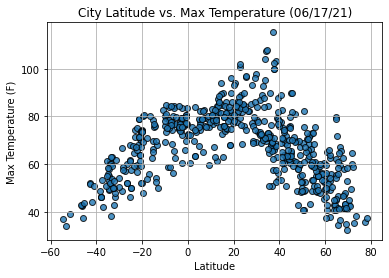

In [54]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Max Temperature(F)"] = citydata_df["Max Temperature(F)"].astype(float)

# Build scatter plot for latitude vs. max temp
plt.scatter(lat,
           tempmax,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Add other properties to graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as image
plt.savefig("output_data/fig_1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

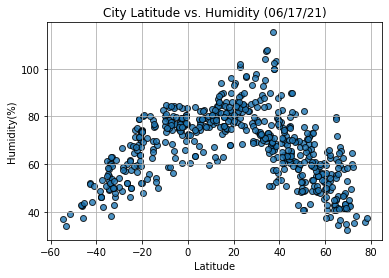

In [58]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Humidity(%)"] = citydata_df["Humidity(%)"].astype(float)

# Build scatter plot for latitude vs. max temp
plt.scatter(lat,
           tempmax,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Add other properties to graph
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as image
plt.savefig("output_data/fig_2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

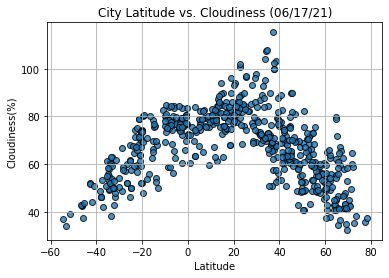

In [59]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Cloudiness(%)"] = citydata_df["Cloudiness(%)"].astype(float)

# Build scatter plot for latitude vs. max temp
plt.scatter(lat,
           tempmax,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Add other properties to graph
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as image
plt.savefig("output_data/fig_3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

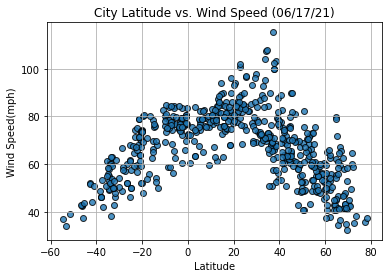

In [60]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Wind Speed(mph)"] = citydata_df["Wind Speed(mph)"].astype(float)

# Build scatter plot for latitude vs. max temp
plt.scatter(lat,
           tempmax,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Add other properties to graph
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as image
plt.savefig("output_data/fig_4.png")

# Show plot
plt.show()

## Linear Regression

In [62]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [64]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = citydata_df.loc[(citydata_df["Latitude"] >= 0)]
southern_hemi_df = citydata_df.loc[(citydata_df["Latitude"] < 0)]

### Max Temp vs. Latitude Linear Regression

The r-value is: 0.4616858536679914


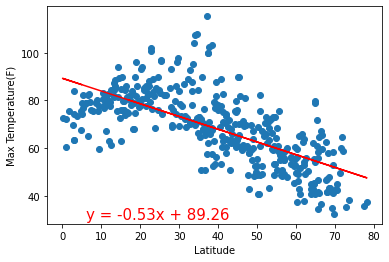

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temperature(F)"]
plot_linear_regression(x_values, y_values, "Max Temperature(F)",(6,30))

The r-value is: 0.6486435088904423


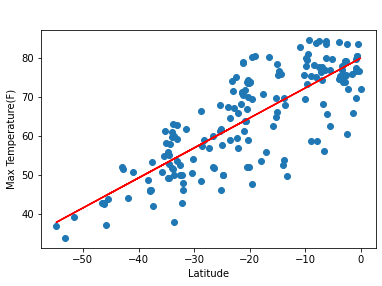

In [77]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temperature(F)"]
plot_linear_regression(x_values, y_values, "Max Temperature(F)", (-55, 90))


The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0010911400617862085


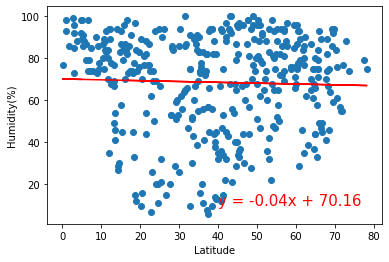

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity(%)"]
plot_linear_regression(x_values, y_values, "Humidity(%)",(40,10))

The r-value is: 0.0009605265017150319


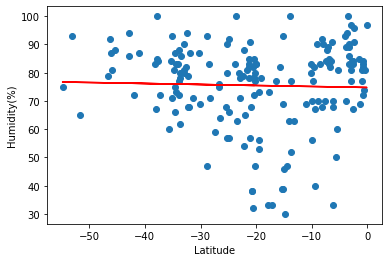

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity(%)"]
plot_linear_regression(x_values, y_values, "Humidity(%)", (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00021022668323323612


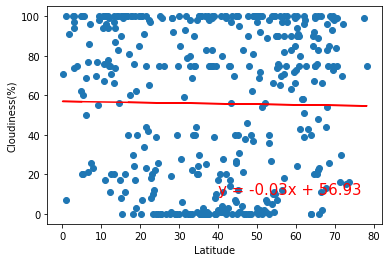

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness(%)"]
plot_linear_regression(x_values, y_values, "Cloudiness(%)", (40,10))

The r-value is: 0.008339485759146465


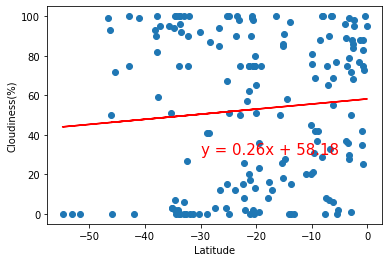

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness(%)"]
plot_linear_regression(x_values, y_values, "Cloudiness(%)", (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0016123576619486702


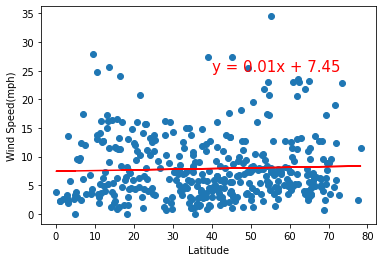

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed(mph)"]
plot_linear_regression(x_values, y_values, "Wind Speed(mph)", (40,25))

The r-value is: 0.0022863615469043293


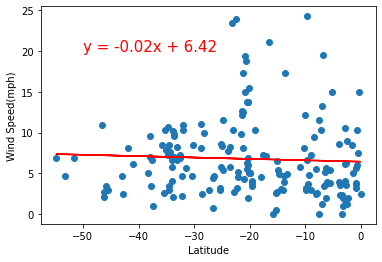

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed(mph)"]
plot_linear_regression(x_values, y_values, "Wind Speed(mph)", (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.